In [1]:
# はじめに必要なライブラリのダウンロードをしておく
! pip install rdkit dgllife
! pip install  dgl -f https://data.dgl.ai/wheels/torch-2.4/repo.html

   ---------------------------------------- 0.0/23.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/23.5 MB 12.7 MB/s eta 0:00:02
   ---- ----------------------------------- 2.9/23.5 MB 7.0 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/23.5 MB 6.9 MB/s eta 0:00:03
   ---------- ----------------------------- 6.3/23.5 MB 7.3 MB/s eta 0:00:03
   -------------- ------------------------- 8.4/23.5 MB 7.8 MB/s eta 0:00:02
   ----------------- ---------------------- 10.5/23.5 MB 8.2 MB/s eta 0:00:02
   ----------------- ---------------------- 10.5/23.5 MB 8.2 MB/s eta 0:00:02
   ------------------- -------------------- 11.3/23.5 MB 6.6 MB/s eta 0:00:02
   ----------------------- ---------------- 13.6/23.5 MB 7.0 MB/s eta 0:00:02
   -------------------------- ------------- 15.7/23.5 MB 7.3 MB/s eta 0:00:02
   ------------------------------ --------- 17.8/23.5 MB 7.6 MB/s eta 0:00:01
   -------------------------------- ------- 19.4/23.5 MB 7.5 MB/s eta 0:00:0

エラーが出るが無視して大丈夫である。

In [ ]:
# 本演習で用いるデータのダウンロード
import urllib.request

# delaney.csv のダウンロード
url1 = "https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv"
urllib.request.urlretrieve(url1, "delaney.csv")

# solubility.train.sdf のダウンロード
url2 = "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf"
urllib.request.urlretrieve(url2, "solubility.train.sdf")

# solubility.test.sdf のダウンロード
url3 = "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf"
urllib.request.urlretrieve(url3, "solubility.test.sdf")


'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


## 今回の目的
病気の治療において、薬は欠かせないものである。これまでの歴史上、薬の開発にはこれまで多くの研究者が数え切れぬほどの実験や試行錯誤を繰り返して、新たな薬の発見に尽力してきた。しかしながら、近年著しい発展を見せるAIによって、膨大な時間とコストを要した伝統的な医薬品探索から、非常に短時間で効率的なin silicoでの (コンピュータ内での) 医薬品探索にシフトしつつあり、今まさに変化の時を迎えている。AIがデザインした薬のいくつかは米国で臨床治験に入っていることから見ても、AIがこれからの創薬技術を変革していくことになるのは想像に難くない。今回は、AI創薬入門としてケモインフォマティクスの初歩やグラフ畳み込みニューラルネットワークを概説する。本プロジェクトを入り口として、AIが分子の特性や構造を予測・デザインする「ケモインフォマティクス」の基礎と、その中核技術であるグラフ畳み込みニューラルネットワークの真髄に触れてほしい。

## 環境の準備

本章ではAI創薬の最初の入口として２つのプロジェクトに挑戦する中で、どのようにして低分子化合物に機械学習を適用するのかということを学んでいく。それではさっそく、データサイエンスにおいてはどこでも使うライブラリーをインポートしてから始めていこう。また、今回行うタスクについてはシンプルな機械学習がメインなので (GPUではなく) CPUで動くようになっている。

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## プロジェクト1: CSVファイルを読み込み、水への溶解度を予測する線形モデルを作る

### RDKitの使い方とSMILES表記

創薬を見据えた化合物の解析を行う際にまず知っておくべきは、**SMILES表記**である。詳細は割愛するが、これは化合物をある決まったやり方で文字列として表記したものであり、SMILESが与えられればそこから化合物を復元することができる。
なぜこのような表記にするかというと、複雑な化合物の構造は機械学習でそのまま扱うことはできないからである。そのため、SMILESのような文字列などに変換して取り扱っていくことになる。
InChIやInChIKeyといったより複雑な規則がある記法もあるが今回は扱わない。

最初のプロジェクトとして、分子量などの化合物情報と水への溶解度の関係を調べた報告<sup>文献1)</sup>のデータを使ってみよう。これはケモインフォマティクスでは練習用として広く使われており、まずはgithubに公開されている整形済みのcsvファイルを使っていく。はじめにダウンロードしたdelaney.csvがそのファイルである。

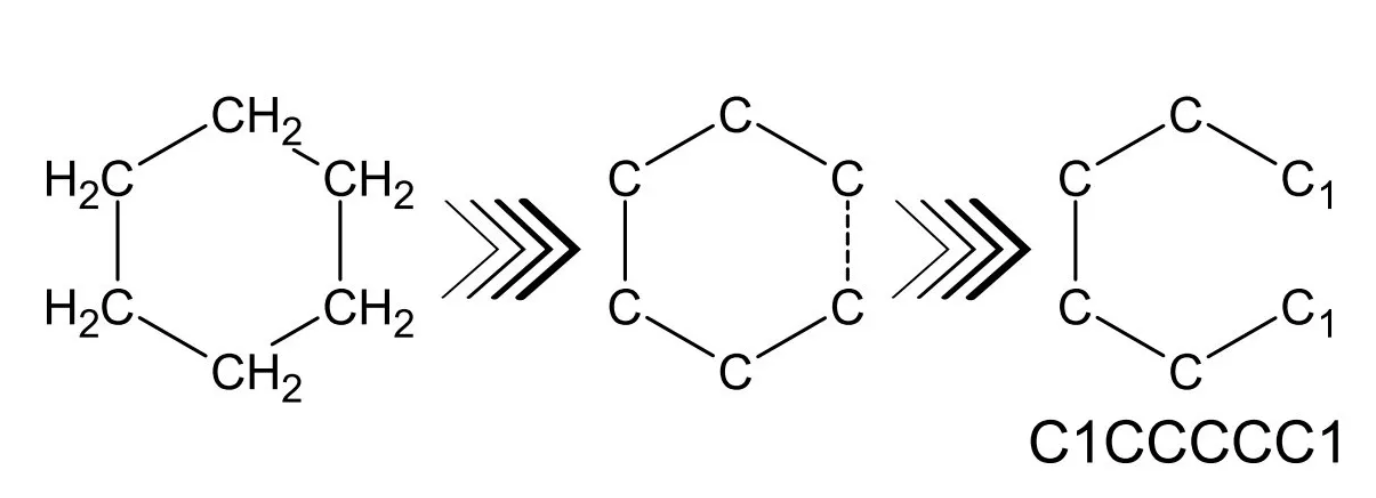

https://luis-vollmers.medium.com/tutorial-to-smiles-and-canonical-smiles-explained-with-examples-fbc8a46ca29f
より引用

In [4]:
sol = pd.read_csv('delaney.csv')
sol

FileNotFoundError: [Errno 2] No such file or directory: 'delaney.csv'

1144個の化合物について、溶解度 (mol/L) やSMILES表記をまとめたデータである。SMILESは表の一番右に記載されており

In [ ]:
sol['SMILES']

In [ ]:
# データの一番最初にある化合物のSMILES表記
sol['SMILES'][0]

などで確認できる。見てお分かりのとおり、元素記号を規則に従って並べた直感的な記法である。RDKitを使うことで、このSMILES表記から簡単に化合物のオブジェクトを生成できる。
（プログラミングの世界では、現実世界のモノや概念をオブジェクトとして表現することが多々ある。化合物のオブジェクトも同様で、例えばPythonのようなオブジェクト指向プログラミング言語では、化合物の性質（分子式、分子量、構造、物理化学的特性など）をまとめて保持するクラスを定義し、そのクラスから作成されるインスタンス（個々の化合物のデータ）を「化合物のオブジェクト」と呼ぶ。）

In [ ]:
from rdkit import Chem

m = Chem.MolFromSmiles(sol['SMILES'][0])
m

RDKitには化合物に関するさまざまな計算を行うことができる関数があらかじめ実装されているので、オブジェクトを作ったあとはそれらを読み出すだけでよい。例えば最もシンプルな化合物の元素の数を数えるというのは

In [ ]:
m.GetNumAtoms()

で表示できる。これはClCC(Cl)(Cl)Cl には炭素Cが2つ、塩素原子4つが含まれていることから正しさが分かる。

当然ながら、複数のSMILESをまとめてオブジェクトにすることもできる。このデータセットに含まれる1144種類をまとめて変換したいのであれば次のようにすればいい。

In [ ]:
mol_list = [Chem.MolFromSmiles(element) for element in sol['SMILES']]
len (mol_list)

### SMILESからの分子記述子の抽出

原著論文では化合物のSMILES表記をもとにLogS（分子の水に対する溶解度にlog10をとったもの）を予測するために、次の4つの**分子記述子** (descriptor) を用いている。分子記述子はその分子を表現する特徴量 (feature) のことだと考えておけばよい。




*   LogP: 分子の有機層（オクタノール層）と水層中の平衡状態での濃度比率について、その常用対数を取ったもの。大きいほど有機層における濃度が高い、つまり脂溶性が高い (もっと平易に言うなら、油に近い) ことを意味。
*   MW: その化合物の分子量
*   RB: 回転可能な結合の数。例えば炭素原子同士の単結合 (C-C) は回転できるが、二重結合 (C=C) は回転できない。
*   AP: 芳香族の比率 (＝芳香族原子の数／重原子数）

これらのうち最初の3つはrdkitで容易に計算できる。その3つをまとめて計算するカスタム関数を作る。












In [ ]:
from rdkit.Chem import Descriptors

# LogP, MW, RBをまとめて計算可能な関数の作成
def calculate_three_descriptors (smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        # LogPを計算
        desc_MolLogP = Descriptors.MolLogP(mol)
        # MWを計算
        desc_MolWt = Descriptors.MolWt(mol)
        # RBを計算
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MolLogP","MolWt","NumRotatableBonds"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

この関数に化合物のSMILES表現を入力することで、データフレーム形式で3つの分子記述子が得られる。

In [ ]:
df = calculate_three_descriptors(sol['SMILES'])
df

実際に先程作成した計算関数で「LogP(MolLogPに対応)」、「MW(MolWtに対応)」、「RB(NumRotatableBondsに対応)」を計算することができた。

4つ目のAP (芳香族の比率) については、まず最初にベンゼン環に関わる原子の数を数えることにする。
Rdkitに実装されているその原子がベンゼン環に関わっているのかTrue/Falseで返すGetIsAromatic() を使い、Pythonのリスト内包表記にて個々の原子について評価していく。

実際の例を見たほうが分かるだろう。例えばデータセットの中の最後の分子であるCNC(=O)Oc1cc(C)cc(C)c1について調べるならばこのように行う。

In [ ]:
m = Chem.MolFromSmiles('CNC(=O)Oc1cc(C)cc(C)c1')

aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

このうちTrueと表記されている原子の数を数えることで、その分子においてベンゼン環に関わる原子はいくつあるのかカウントできる。数を数える操作を関数にして、CNC(=O)Oc1cc(C)cc(C)c1の例で実際に数えてみよう。

In [ ]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [ ]:
AromaticAtoms(m)

これである1分子については調べることができるようになった。それでは1144分子をまとめてカウントし、リストに格納しよう。

In [ ]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

APはベンゼン環に関する原子が全ての重原子 (heavy atom, ここでは水素以外の原子のこと) 数のどれくらいの割合かという指標である。1分子の例を示す。

In [ ]:
m = Chem.MolFromSmiles('CNC(=O)Oc1cc(C)cc(C)c1')
AromaticAtoms(m)/Descriptors.HeavyAtomCount(m)

これを1144分子全てについて計算し、データフレームにする。

In [ ]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
df_desc_AromaticProportion

それでは先ほど計算した3つの分子記述子と、今計算したばかりのAPを組み合わせよう。

In [ ]:
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

そして予測したい水への溶解度であるlogSを正解ラベルyとする。

In [ ]:
y = sol.iloc[:,1]
y = y.rename('logS')
y

分布をヒストグラムにして見てみよう。

In [ ]:
y.hist()

### プロジェクト2 :  はじめてのQSPR解析
化学構造と物理的性質との関係を定量的構造物性相関（**QSPR**、Quantitative Structure-Property Relationship）という。1960年頃から研究されている学問分野であるが、近年は機械学習を活用した手法も登場してきた。

そこで今回は、シンプルな機械学習を使って水への溶解度を予測しよう。データ数は1144, そしてSMILESから変換した4つの分子記述子を入力として、logSを出力としたQSPRモデルを作る。

まずはいつものようにトレーニングとテストデータに分割する。

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

機械学習のフレームワークscikit-learnを使って、最もシンプルな線形回帰を行う。

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

たったこれだけで学習終了だ。試しにトレーニングデータをもう一度見せてlogSを予測させ、トレーニングデータをシンプルな線形回帰がどの程度説明できるかを見てみよう。

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

決定係数$R^2$は0.78前後であり、トレーニングデータのかなりの部分は**4つの分子記述子の線形結合のみで説明可能**であることを示している。

ちなみに決定係数$R^2$は、作成したモデルが、データ全体のばらつきをどれだけうまく「説明」できているかを示す指標を意味する。
もっと平易に表すと、作った予測モデルが、知りたいこと（目的変数）の「なぜそうなるのか」という理由（ばらつき）を、提供された情報（説明変数）を使って、どれだけ「言い当てられているか」をパーセンテージで表したような指標のことである。

ただこれはトレーニングデータに対する性能であるからある意味では当たり前だ。**我々が知りたいのは、まだ見ぬテストデータに対する性能指標**である。それでは調べてみよう。

In [ ]:
y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))

なんと、シンプル極まりないモデルであるのに一度も見ていないテストデータに対して決定係数$R^2$は0.75前後もある。トレーニングデータに対する指標とほとんど遜色ないことから、このモデルは過学習せずにlogSを予想できていると言えるだろう。

線形回帰なのでとてもシンプルなモデルだ。どれくらい簡単なモデルなのか、ということは次のように定式化することでより自明になる。

In [ ]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

print('LogS = ' +
      ' ' +
      yintercept +
      ' ' +
      LogP +
      ' ' +
      MW +
      ' ' +
      RB +
      ' ' +
      AP)

とてもシンプルな関係式が得られた (係数は毎回少しずつ変わりうる)。

$LogS =  0.29 -0.77 LogP -0.0063 MW + 0.0030 RB -0.43 AP$


このシンプルなモデルでどれほど正確な予測ができるのかを図示しておこう。
左側がトレーニングデータを使ったプロットで、右側がテストデータを使ったプロットである。

In [ ]:
## 左側がトレーニングデータに関する実測logSと予測logS
plt.figure(figsize=(11,5))

plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')


## 右側がテストデータに関する実測logSと予測logS
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.xlabel('Experimental LogS')

plt.show()

いずれも、x軸に示す実験的に求めたlogSとy軸に示す予測logSには強い正の相関があることが分かるだろう。わずか1000化合物のデータで、しかも極めてシンプルな線形回帰だけでここまで迫れるのである。

それでは、線形回帰ではなくより複雑なモデルを使ってもう少し精度を高めることはできないだろうか？ 入力として使う特徴量は同じ4種類のものを使う。いろいろなアルゴリズムがあるが、ここではLightGBMという方法を紹介しよう。

また、昔と異なり生成AIがある現在はすべてのコードを自分で書く必要は必ずしもない。ここでは生成AIにLightGBMのコードを書いてもらおう。AIで生成しますというのをクリックし「同じことをLightGBMでやってみたいです」と入れてみる。

一応、ここにもAIが書いたコードを残しておく。

In [ ]:
# prompt: 同じことをLightGBMでやってみたいです

import matplotlib.pyplot as plt
import numpy as np
!pip install lightgbm

import lightgbm as lgb

# LightGBMモデルのインスタンス化と学習
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

# トレーニングデータでの予測と評価
y_pred_train_lgbm = lgbm.predict(X_train)
print('LightGBM - Training data:')
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_train, y_pred_train_lgbm))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_train, y_pred_train_lgbm))
print("-" * 20)

# テストデータでの予測と評価
y_pred_test_lgbm = lgbm.predict(X_test)
print('LightGBM - Test data:')
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred_test_lgbm))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred_test_lgbm))

# 結果のプロット
plt.figure(figsize=(11,5))

# トレーニングデータ
plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_pred_train_lgbm, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_pred_train_lgbm, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "#F8766D")
plt.ylabel('Predicted LogS (LightGBM)')
plt.xlabel('Experimental LogS')
plt.title('Training Data (LightGBM)')


# テストデータ
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=y_pred_test_lgbm, c="#619CFF", alpha=0.3)
z = np.polyfit(y_test, y_pred_test_lgbm, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "#F8766D")
plt.xlabel('Experimental LogS')
plt.title('Test Data (LightGBM)')

plt.show()


テストデータでの性能は0.9近く出ていることがわかる。先ほどの線形回帰では0.78程度だったから、性能が向上している。

ここで使ったLightGBMは、勾配ブースティング決定木 (GBDT) の一種だ。今回のように、テーブル形式で表されるデータのときにはtreeベースの手法 (ランダムフォレスト、およびGBDT) がパフォーマンスとして優れることが多い。

機械学習モデルはしばしば「ブラックボックス」と言われるが、その判断根拠を可視化するeXplainable AI (説明可能なAI, XAI) という技術に注目が集まっている。代表的な手法であるSHAPを使って、今のLightGBMモデルの判断根拠を可視化してみよう。ここでも生成AIを使ってコードを書いてもらう。「LightGBMの判断根拠をSHAPで可視化したいです」というだけだ。

念の為に生成AIのコードを残しておく。

In [ ]:
# prompt: LightGBMの判断根拠をSHAPで可視化したいです

!pip install shap
import shap

# SHAP Explainerの作成
explainer = shap.Explainer(lgbm)

# トレーニングデータまたはテストデータに対するSHAP値の計算
# 例としてテストデータを使用
shap_values = explainer(X_test)

# Summary Plotの表示
# 特徴量の重要度と、各特徴量が予測に与える影響の向き（正または負）を視覚化
shap.summary_plot(shap_values, X_test)

# Decision Plotの表示（オプション）
# 個々の予測に対するSHAP値の累積的な影響を視覚化
# 任意の数のサンプルを選択して表示できます
# 例として最初の5つのテストサンプルを表示
# shap.decision_plot(explainer.expected_value, shap_values.values[0:5,:], X_test.iloc[0:5,:])

# Force Plotの表示（オプション）
# 個々の予測が平均的な予測からどのように逸脱するかを視覚化
# 例として最初のテストサンプルのForce Plotを表示
# shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0,:])

## プロジェクト3のための準備


### データのダウンロード

化合物情報が記述されたファイルとして先ほどはcsvの例を示したが、実はよりメジャーなのは**sdf** (Structure Data File) というファイル形式である。化合物の溶解度についてRDKitもSDFファイル形式でデータを配布しているので、今回はそちらを使ってみよう。

In [ ]:
! ls

はじめにダウンロードしたsolubility.train.sdfとsolubility.test.sdfが表示されていれば問題ない。どんなファイルなのか少しだけ覗いてみよう。headコマンドで最初の40行を表示する。

In [ ]:
! head -n 40 solubility.train.sdf

一番最初に化合物の名前が書かれていて、その次に書かれているのはRDKitが計算した各原子の座標や原子間の接続に関する情報である。我々が知りたいのはこの化合物の溶解度 (logS) であり、**SOL**というところに書かれている-3.18という数値が該当する。また、この化合物のSMILESはCCCCCだ。この両者の間にある「SOL_classification」というのは、水への溶解度SOLを3つのクラス (low, intermediate, high) に分類した結果が示されている。そして$の記号が4つ並んだあとに、また次の化合物の情報が表示されている。

このように、SDFファイル形式は複数の化合物のさまざまな情報をまとめて保持している。幸いなことに、RDKitにはこのファイル形式を簡単に読み込めるSDMolSupplier関数が実装済みである。

In [ ]:
train = [ mol for mol in Chem.SDMolSupplier('solubility.train.sdf')]
test = [ mol for mol in Chem.SDMolSupplier('solubility.test.sdf')]

In [ ]:
print ('training: ', len (train))
print ('test: ', len (test))

トレーニングデータ1025化合物、テストデータ257化合物、合わせて1282化合物の情報をSDFファイルから読み込んだ。どのようにデータにアクセスすればいいのかというと、GetPropsAsDict()の後ろに欲しい属性を指定すればいい。属性名はSDFファイルで<>で囲まれていたものだ。

例としてトレーニングデータの1番目の化合物 (headコマンドで確認したn-pentane)　の溶解度であれば

In [ ]:
train[0].GetPropsAsDict()["SOL"]

SMILESであれば

In [ ]:
train[0].GetPropsAsDict()["smiles"]

という要領だ。当然ながら、先ほど確認したデータと一致している。

## プロジェクト3: グラフ畳み込みニューラルネットワークによる水溶解性予測
先ほどのプロジェクトは、研究者が手動で設計した分子記述子(SMILES)の特徴量をまず得て、それをもとに機械学習を行うというアプローチをとっていた。しかし、深層学習においてはそういった特徴量設計すら自動化できるのだ。そこで次のプロジェクトとして、全く同じデータセットを使って今度は専門家が長年の研究の末に開発した特徴量ではなく、SMILESや化学構造のみから水への溶解度を予測しよう。

先ほどは回帰問題を扱ったので、ここでは分類問題に挑戦してみる。SDFファイルの解説の際にも示したとおり、このデータセットには水への溶解度を3クラスにあらかじめ分類した結果が示されているので、化合物の構造データ (SMILES) のみから水への溶解度がlow, intermediate, highのいずれになるかを予測することに挑戦しよう。

### グラフとは何か？
これまでの2つのプロジェクトでは、ある化合物の情報をそれぞれ4つの数値、あるいは208個の数値に変換した。これら数値の特徴量をもとに機械学習アルゴリズムを動かしたのだった。同様に、深層学習においても化合物そのものではなくそれを何らかの数値に変換してから3クラス分類問題を解くことになる。いくつかのアプローチが考えられるところだが、本章では**グラフ畳み込みニューラルネットワーク** (GCN)を使っていく。

畳み込みニューラルネットワークは午前中に勉強したかもしれないが、特に画像に優れた威力を発揮する。画像は個々のピクセルでできていて、そのピクセルは規則正しく上下左右と連なっている。そのためある一定のカーネル (フィルター) を動かしていくことで、情報を集約できるのだ。ところで、もしこの規則性が全くなかったらどうだろうか？ 例えばところどころ接続がなかったり、あるピクセルに多数のピクセルが接続していたり、そもそも全く孤立したピクセルがあったとしたら、画像解析で威力を発揮した畳み込みニューラルネットワークはほとんど何もできないだろう。

そこで画像を一般化した、**グラフ** (graph) と呼ばれるネットワーク構造における畳み込みを行う手法であるグラフ畳み込みニューラルネットワークが用いられることがある。グラフの頂点のことを**ノード** (node)、グラフの辺のことを**エッジ** (edge) という。化合物においては、原子をノードと見立て、化学結合をエッジと見立てれば、任意の化合物をグラフで表現できることになる。グラフで表現できれば、グラフ畳み込みニューラルネットワークが使えるというわけだ。

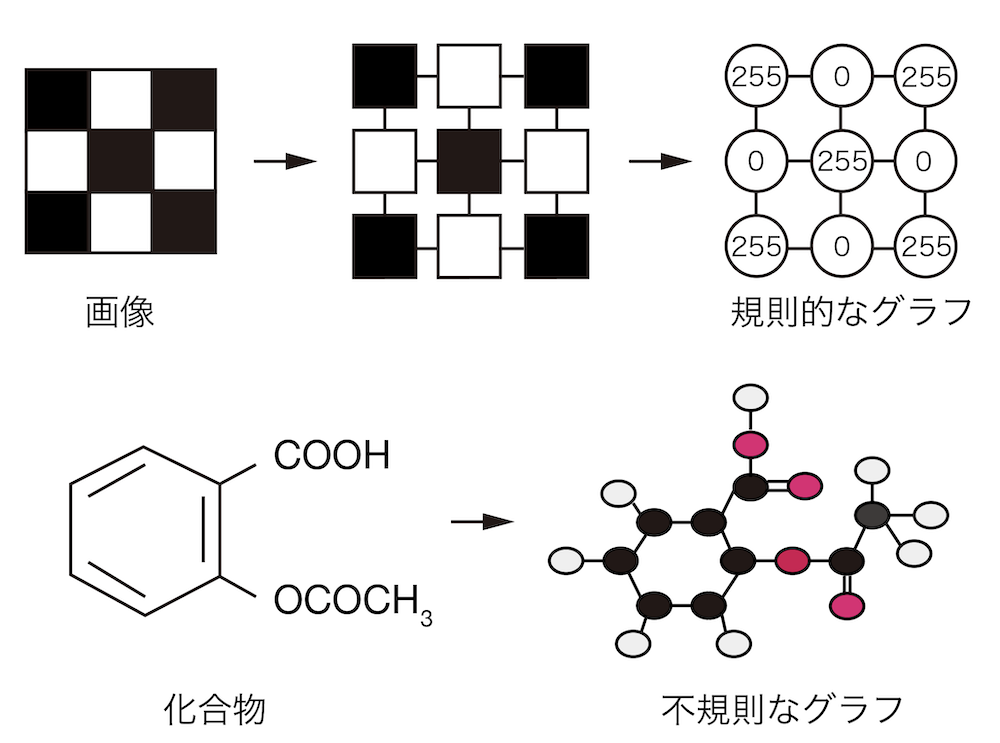

ある固定長のフィルターを動かす画像用の畳み込みとは異なり、グラフ畳み込みニューラルネットワークはそれぞれのノードへの接続数に応じて柔軟にフィルターを変形させながら、周囲のノードやエッジが持つ情報を統合していく。また、本プロジェクトでは最終的にそれぞれのノードが持つ情報を全部まとめてグラフ全体としての数値にする必要があるが、これはreadoutと呼ばれる処理である。どのようにノードやエッジの情報を伝搬させていくか (massage passing) やreadoutをするかによって、さまざまなバリエーションが提案されている。

### ライブラリーのインストールとデータの確認

グラフ構造への深層学習の応用についてはさまざまな手法が提案されているが、本章ではその中でも比較的シンプルなものを紹介する。また、いろいろなグラフニューラルネットワーク手法を手軽に扱えるためのパッケージも複数登場しており、例えば[PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/)や[DGL (Deep Graph Library) ](https://www.dgl.ai/) などがある。

今回はその中でもDGLを使っていくが、その理由はDGLはPyTorchにもTensorFlowにも対応しているため将来的にTensorFlowをメインで使う機会があったとしてもPyTorch版のDGLコードを微修正するのみで済むということと、DGLだけでも便利なのだが[DGL-LifeSci](https://lifesci.dgl.ai/)という生命科学研究に役立つツールやデータセットも利用可能だからだ。

すでにデータはもう読み込んでいるのだが、ここでは確認のためプロジェクト3の目標を確認しておこう。

In [ ]:
## トレーニングデータデータの読みこみとデータフレーム化
X = [mol.GetPropsAsDict()["smiles"] for mol in train]
y = [mol.GetPropsAsDict()["SOL_classification"] for mol in train]

df = pd.DataFrame ({'SMILES': X, 'classification': y})
df

今回の目標は、SMILESとclassificationの間の対応関係を深層学習で見出すことであり、先人達が考案したさまざまな分子記述子は利用できない。classificationは次のように3つのラベルがある。

In [ ]:
set (df['classification'])

わずか1000例ほどのデータのみから、水への溶解性をどの程度まで予測できるのだろうか？

### 深層学習モデルの構築

それでは深層学習モデル構築に必要なライブラリーをインポートしよう。

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.nn import CrossEntropyLoss

DGLライブラリーはPyTorchの他にTensorFlowなどが使えるが、デフォルトではPyTorchだと認識してくれるのでここでは簡便のためにこのまますすめる。

In [ ]:
import dgl
from dgl.data import DGLDataset

そして次にDGL-LifeSciライブラリーに実装されている関数やクラスをインポートしよう。

In [ ]:
from dgllife.utils import mol_to_graph
from dgllife.utils import mol_to_complete_graph
from dgllife.utils.featurizers import CanonicalAtomFeaturizer
from dgllife.utils.featurizers import CanonicalBondFeaturizer

これらのうち、CanonicalAtomFeaturizerとCanonicalBondFeaturizerはそれぞれ原子や化学結合の特徴量を抽出してくれるクラスであるのでインスタンス化しておく。

In [ ]:
atom_featurizer = CanonicalAtomFeaturizer()
bond_featurizer = CanonicalBondFeaturizer()

そして、例えばトレーニングデータの最初の化合物であれば次のように使う。今回は簡便にするため、ノード、すなわち原子の情報のみしか使わないことにする。実際には、エッジの情報である化学結合の種類なども考慮した方が望ましい。mol_to_complete_graphというのは、SMILESからRDKitが生成した化合物オブジェクトをDGLが扱えるようなグラフ構造に自動的に変換する関数だ。

In [ ]:
g = mol_to_complete_graph(train[0],
                          add_self_loop=False,
                          node_featurizer=atom_featurizer,
                          #edge_featurizer= bond_featurizer
                         )

n_feats = atom_featurizer.feat_size('h')
print(n_feats)

できたグラフを見てみよう。これはトレーニングデータの最初の化合物のグラフ表現である。

In [ ]:
g

ノード数は5、エッジ数は20になっている。各ノードには74次元の特徴量が自動的に割り振られているようだ。この化合物は

In [ ]:
train[0].GetPropsAsDict()["smiles"]

であったから、ノード数5・エッジ数20というのは間違いない。1つずつではなくて、全部まとめてグラフ構造にしてリストに格納しておこう。

In [ ]:
train_g = [mol_to_complete_graph(m, node_featurizer=atom_featurizer) for m in train]
test_g = [mol_to_complete_graph(m, node_featurizer=atom_featurizer) for m in test]

次に正解ラベルであるclassicationについて考える。現在は「(A) low」のような表記だが、当然ながらこれもカテゴリー化しておく必要がある。いろいろなやり方ができるが、ここでは以下のように辞書を作成しそれをもとに数値にして、最終的に整数型のnumpy配列にしておこう。

In [ ]:
prop_dict = {
    "(A) low": 0,
    "(B) medium": 1,
    "(C) high": 2
}

train_y = np.array([prop_dict[m.GetProp('SOL_classification')] for m in train])
train_y = np.array(train_y, dtype=np.int64)

test_y = np.array([prop_dict[m.GetProp('SOL_classification')] for m in test])
test_y = np.array(test_y, dtype=np.int64)

In [ ]:
train_y

次にグラフ畳み込みの定義だが、ここではdgllifeライブラリーに実装済みのGCNPredictorクラスを使うことにしよう。

In [ ]:
from dgllife.model import GCNPredictor

具体的には、GCNを2回繰り返し、その1回目では各原子の特徴量を74次元から60次元にして、2回目でそれをさらに20次元に落とす。また最終的に分類したい3クラスになるように設定し、その途中には過学習を抑制するためにドロップアウトを適用する。

In [ ]:
ncls = 3

gcn_net = GCNPredictor(in_feats=n_feats,
                    hidden_feats=[60,20],
                    n_tasks=ncls,
                    predictor_hidden_feats=10,
                    dropout=[0.1,0.1])

また、グラフ畳み込みを行ったあとにグラフ全体のデータをまとめて1つにするためのcollate関数を実装する。

In [ ]:
def collate(sample):
    graphs, labels = map(list,zip(*sample))
    batched_graph = dgl.batch(graphs)
    batched_graph.set_n_initializer(dgl.init.zero_initializer)
    batched_graph.set_e_initializer(dgl.init.zero_initializer)
    return batched_graph, torch.tensor(labels)

ここまで来たらもうあとは普通の処理とほとんど同じである。データローダーを作成し、今回はバッチサイズを128とした。

In [ ]:
train_data = list(zip(train_g, train_y))
train_loader = DataLoader(train_data, batch_size=128, shuffle=True, collate_fn=collate, drop_last=True)

損失関数には多クラス分類問題で毎度おなじみ、クロスエントロピー関数を採用するし、オプティマイザーとしてはAdamを学習率0.001で使うことにする。また、このモデルは途中にdropoutが入っているのでこれをきちんと効かせるためにも訓練時には学習モード (.train()) にする。

In [ ]:
loss_fn = CrossEntropyLoss()
optimizer = torch.optim.Adam(gcn_net.parameters(), lr=0.001)
gcn_net.train()

### グラフ畳み込みニューラルネットワークの学習

それではこのモデルで学習を行ってみよう。ここでは200エポック学習させ、20エポックごとに損失 (loss) とトレーニングデータに対する正解率 (ACC) を表示している。

In [ ]:
epoch_losses = []
epoch_accuracies = []
for epoch in range(1,201):
    epoch_loss = 0
    epoch_acc = 0
    for i, (bg, labels) in enumerate(train_loader):
        atom_feats = bg.ndata.pop('h')
        pred = gcn_net(bg, atom_feats)
        loss = loss_fn(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
        pred_cls = pred.argmax(-1).detach().numpy()
        true_label = labels.numpy()
        epoch_acc += sum(true_label==pred_cls) / true_label.shape[0]
    epoch_acc /= (i + 1)
    epoch_loss /= (i + 1)
    if epoch % 20 == 0:
        print(f"epoch: {epoch}, Loss: {epoch_loss:.3f}, ACC: {epoch_acc:.3f}")
    epoch_accuracies.append(epoch_acc)
    epoch_losses.append(epoch_loss)

訓練データに対する正解率は90%前半台に到達した。推移をグラフに表示しよう。

In [ ]:
plt.style.use('ggplot')
plt.plot([i for i in range(1, 201)], epoch_losses, c='b', alpha=0.6, label='loss')
plt.legend()
plt.plot([i for i in range(1, 201)], epoch_accuracies, c='r', alpha=0.6, label='acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
print ('損失を青で、正解率を赤で表示')

順調に学習できたことが見て取れる。それではテストデータに対してはどうだろうか？　テストデータとデータローダーを作成する。

In [ ]:
test_data = list(zip(test_g, test_y))
test_loader = DataLoader(test_data, batch_size=128, collate_fn=collate, drop_last=True)

Dropoutをオフにするために、忘れずに推論モード (.eval()) にしてから検証する。

In [ ]:
gcn_net.eval ()

correct = 0
total = 0

with torch.no_grad():
  for x, y in test_loader:
      atom_feats = x.ndata.pop('h')
      pred = gcn_net(x, atom_feats)
      _, predicted = torch.max(pred.data, 1)
      total += y.size(0)
      correct += (predicted == y).sum().item()
print('正解率', int(correct)/total*100)

正解率は80%台、まずまずの性能ではないだろうか？ 混同行列を書いてみる。

In [ ]:
true_list = []
pred_list = []

with torch.no_grad():
  for x, y in test_loader:
    atom_feats = x.ndata.pop('h')
    pred = gcn_net(x, atom_feats)
    _, predicted = torch.max(pred.data, 1)
    pred_list += predicted.detach().numpy().tolist()
    true_list += y.detach().numpy().tolist()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_list, pred_list)
print(cm)

これだけでは分かりにくいのでもう少しきれいにして表示しよう。

In [ ]:
import seaborn as sns

cm = pd.DataFrame(data=cm, index=prop_dict.keys(),
                           columns=prop_dict.keys())

sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='d')
plt.yticks(rotation=0)
plt.xlabel("Prediction", fontsize=13, rotation=0)
plt.ylabel("Ground Truth", fontsize=13)

print ('溶解度予測モデルのテストデータにおける混同行列')

In [ ]:
# コードを自動作成したもの

from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import torch # torchをインポート
import numpy as np # numpyをインポート

# true_list と pred_list はテストデータに対する予測結果と正解ラベルです

print("Evaluation Metrics for Test Data:")
print("---------------------------------")

# Accuracy
accuracy = accuracy_score(true_list, pred_list)
print(f"Accuracy: {accuracy:.3f}")

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(true_list, pred_list, target_names=prop_dict.keys(), output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nPrecision, Recall, F1-Score per Class:")
print(report_df[['precision', 'recall', 'f1-score']].to_markdown(floatfmt=".2f"))

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(true_list, pred_list)
print(f"\nMatthews Correlation Coefficient (MCC): {mcc:.3f}")

# ROC-AUC (多クラス分類の場合)
# モデルの予測確率を取得
gcn_net.eval()
with torch.no_grad():
    # test_loader からバッチを取得し、予測確率を計算
    test_preds_proba_list = []
    for x, y in test_loader:
        atom_feats = x.ndata.pop('h')
        pred = gcn_net(x, atom_feats)
        test_preds_proba_list.append(pred.softmax(dim=1).numpy())

    # バッチごとの結果を結合
    if test_preds_proba_list: # リストが空でないか確認
        test_preds_proba = np.concatenate(test_preds_proba_list, axis=0)
    else:
        test_preds_proba = np.array([]) # 空の場合は空のnumpy配列を設定


# 正解ラベルをone-hotエンコーディング
lb = LabelBinarizer()
# true_list が空でないか確認
if true_list:
  test_y_onehot = lb.fit_transform(true_list) # true_list を使用
else:
  test_y_onehot = np.array([])


# クラスごとのROC-AUCを計算
roc_auc_scores = {}
if test_y_onehot.shape[0] > 0 and test_preds_proba.shape[0] > 0:
    for i, class_name in enumerate(prop_dict.keys()):
        # そのクラスがテストデータに存在し、かつ予測確率がある場合のみ計算
        if test_y_onehot[:, i].sum() > 0:
            roc_auc_scores[class_name] = roc_auc_score(test_y_onehot[:, i], test_preds_proba[:, i])
        else:
            roc_auc_scores[class_name] = float('nan') # テストデータに存在しない場合はNaNを設定

print("\nROC-AUC per Class:")
if roc_auc_scores: # roc_auc_scoresが空でないか確認
    for class_name, score in roc_auc_scores.items():
        if not np.isnan(score):
            print(f"  {class_name}: {score:.3f}")
        else:
            print(f"  {class_name}: N/A (No samples in test data)")
else:
    print("  Could not calculate ROC-AUC (Insufficient data)")

このようにグラフ畳み込みニューラルネットワークを使うことでテストデータにおいても化合物の構造のみからその物性をほぼ正確に予測することができた。訓練データに使ったのは1000データほどと深層学習にしては小規模なデータセットであること、また単結合・二重結合の違いといったエッジ情報を一切無視したシンプルなモデルでもこのくらい良好な性能が出ていることを考えると、水への溶解度という一番基本的な物性についてはこの仕組みでほぼ完璧に予測できるといっていいだろう。

## おわりに
今回はいくつかのプロジェクトを通じてAI創薬への橋渡しとなる入門事項を中心に解説した。AI創薬はこれらの延長線上にあるにすぎない。例えば最後のプロジェクトではグラフ畳み込みニューラルネットワークを使って化合物の水への溶解度データを予測したが、この教師データを抗菌活性に変えるだけでAIで新規抗菌薬を発見できるようになる<sup>文献2)</sup>。血中半減期データを使えば化合物の構造から生体内での血中半減期を予測するモデルになるだろう。

AIが驚異的な速さで薬を見出したという例は、現在、トップジャーナルで多数報告され始めており<sup>文献3)</sup>、またAIが開発したいくつかの薬 (の候補) は現在臨床治験に入っている<sup>文献4, 5)</sup>。ぜひ機械学習を活用して冒頭で提示したこれまでの創薬が抱える大きな難題の克服に向けチャレンジしてほしい。

## 参考文献

1. Delaney JS: J. Chem. Inf. Comput. Sci. 44: 1000-1005, 2004 doi: 10.1021/ci034243x

2. Stokes JM, et al: Cell 180: 688-702.e13, 2020 doi: 10.1016/j.cell.2020.01.021

3. Mak, KK., et al: Springer, Cham., 2024 doi: 10.1007/978-3-031-35529-5_92

4. Jayatunga MKP, et al: Nat. Rev. Drug Discov. 21: 175-176, 2022 doi: 10.1038/d41573-022-00025-1

5. Zuojun Xu, et al : Nat Med, 2025 doi: 10.1038/s41591-025-03743-2
